In [44]:
!python --version

Python 3.8.2


In [53]:
import numpy as np
from statistics import NormalDist
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import cauchy


In [46]:
NormalDist(0, 1).cdf(1)

0.8413447460685429

In [47]:
x2 = NormalDist(5400, 3600).cdf(5400+1800)
# 0.9750021048517796

x1 = NormalDist(5400, 3600).cdf(5400-1800)
# 0.024997895148220428

difference = x2 - x1

print("traffic proportion in between: ", difference)

traffic proportion in between:  0.38292492254802607


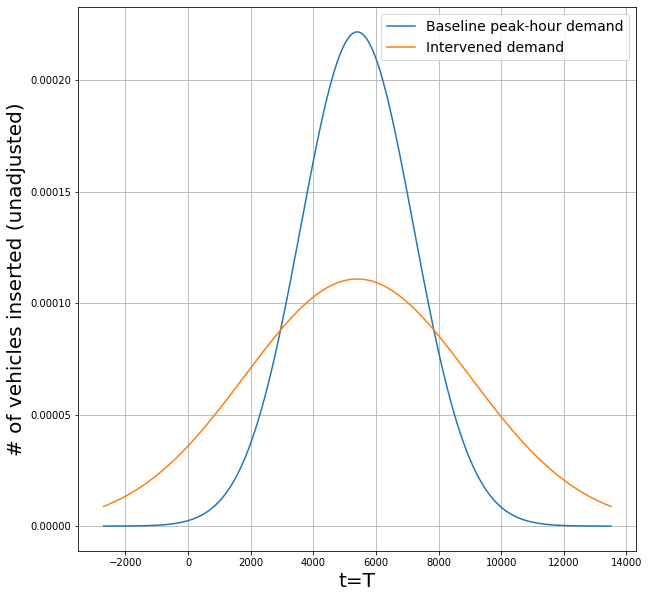

In [48]:
mu = 5400
sigma = 1800
sigma2 = 3600

x = np.linspace(mu - 4.5*sigma, mu + 4.5*sigma, 500)
y = stats.norm.pdf(x, mu, sigma)
y2 = stats.norm.pdf(x, mu, sigma2)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,y, label='Baseline peak-hour demand')
ax.plot(x, y2, label='Intervened demand')

ax.set_xlabel('t=T', fontsize=20)
ax.set_ylabel('# of vehicles inserted (unadjusted)', fontsize=20)
ax.grid()
ax.legend(prop={'size':14})


fig.savefig('test.png')

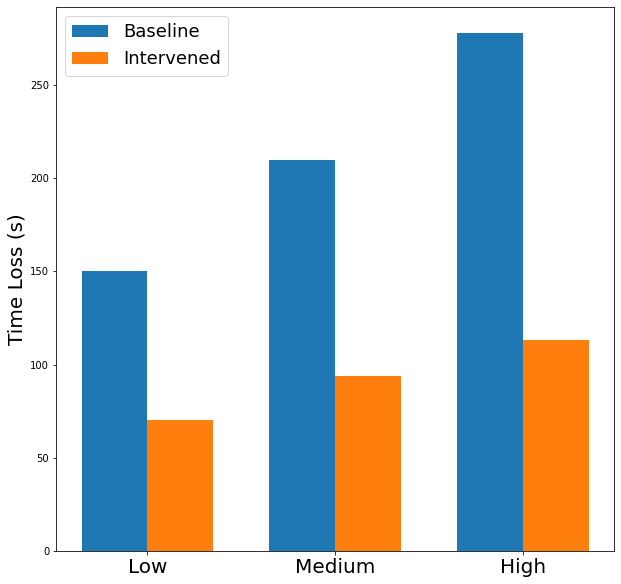

In [49]:
N = 3
baseline = (150, 210 , 278)
intervened = (70, 94, 113)

ind = np.arange(N) 
width = 0.35      

fig, ax = plt.subplots(figsize=(10,10))

plt.bar(ind, baseline, width, label='Baseline')
plt.bar(ind + width, intervened, width,
    label='Intervened')

ax.set_xlabel(xlabel='') 
ax.set_ylabel('Time Loss (s)', fontsize=20)


plt.xticks(ind + width / 2, ('Low', 'Medium', 'High'))
plt.xticks(fontsize=20)
plt.legend(loc='best')
ax.legend(prop={'size':18})
plt.show()
fig.savefig("TimeLoss.png")

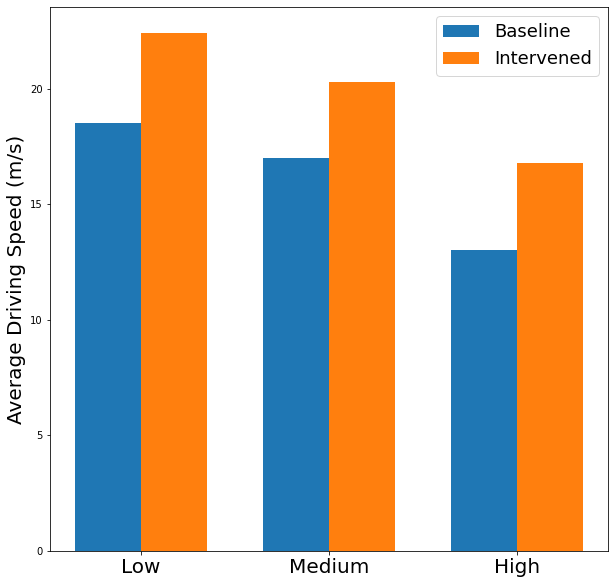

In [50]:
N = 3
baseline = (18.5, 17 , 13)
intervened = (22.4, 20.3, 16.8)

ind = np.arange(N) 
width = 0.35      

fig, ax = plt.subplots(figsize=(10,10))

plt.bar(ind, baseline, width, label='Baseline')
plt.bar(ind + width, intervened, width,
    label='Intervened')

ax.set_xlabel(xlabel='') 
ax.set_ylabel('Average Driving Speed (m/s)', fontsize=20)


plt.xticks(ind + width / 2, ('Low', 'Medium', 'High'))
plt.xticks(fontsize=20)
plt.legend(loc='best')
ax.legend(prop={'size':18})
plt.show()
fig.savefig("average-driving-speed.png")

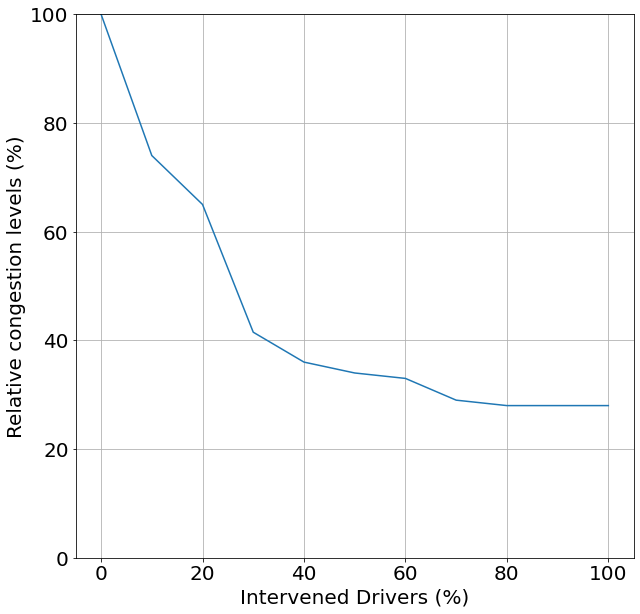

In [128]:
x = np.arange(0,110,10)
y = [100, 74, 65, 41.5, 36, 34, 33, 29, 28, 28, 28] 


fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,y)
ax.set_xlabel(xlabel='Intervened Drivers (%)', fontsize=20) 
ax.set_ylabel('Relative congestion levels (%)', fontsize=20)
ax.grid()
plt.ylim(0,100)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(loc='best')
# ax.legend(prop={'size':18})

plt.show()
fig.savefig("relative-congestion.png")

median:  10.0


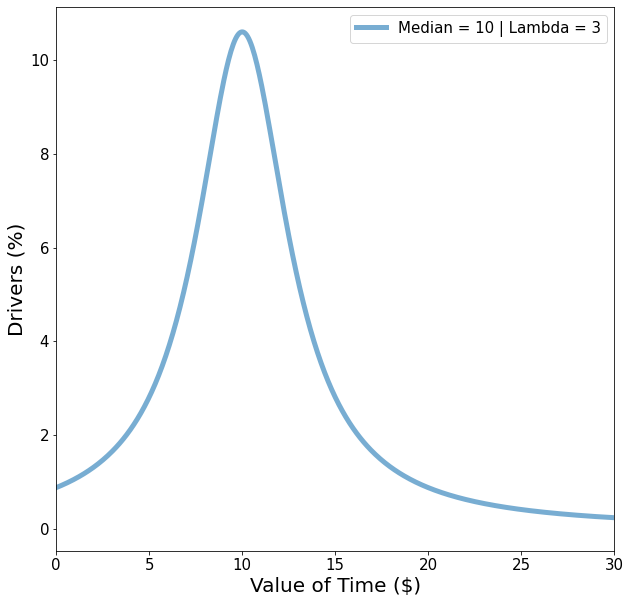

In [157]:


loc, scale = 10, 3


x = np.linspace(cauchy.ppf(0.01),cauchy.ppf(0.99), 1000)
rv = cauchy(loc, scale)
y = rv.pdf(x)


samples = rv.rvs(size=1000)

print("median: ", rv.median())
y = y*100

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel(xlabel='Value of Time ($)', fontsize=20) 
ax.set_ylabel('Drivers (%)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.set_xlim(0,30)
ax.plot(x,y, lw=5, alpha=0.6, label="Median = 10 | Lambda = 3")
ax.legend()
ax.legend(prop={'size':15})
fig.savefig("vot.png")